# Image segmentation

### K-means

Let X be a set of pixels and V be a set of K cluster centers in 3D (R,G,B).
% Randomly initialize the K cluster centers
% Compute all distances between pixels and cluster centers
% Iterate L times
% Assign each pixel to the cluster center for which the distance is minimum
% Recompute each cluster center by taking the mean of all pixels assigned to it
% Recompute all distances between pixels and cluster centers
Create a function in Python that implements the K-means clustering algorithm
segmentation, centers = kmeans segm(image, K, L, seed)

In [65]:
import sys
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from Functions import showgrey, mean_segments, overlay_bounds
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial import distance_matrix


C:\Users\andre\AppData\Local\Temp\ipykernel_26880\2230528363.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


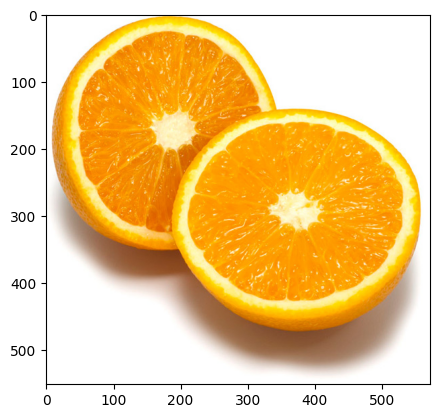

In [66]:
img = Image.open('Images-jpg/orange.jpg')
plt.imshow(img)

### K-means clustering
* Group pixels based on similarity in colours (or any other measure).
* K-means algorithm:
    1. Choose K initial mean values (possibly randomly) => Random colors.
    2. Assign each pixel to the mean that is closest.
    3. Update means as the average of pixels assigned to each mean.
    4. Iterate until there is no change in mean values.

In [67]:
def kmeans(image, K, L, seed, convergence=False):
    """Performs K-means clustering on an image.
    Args:
        image: Image to segment [H x W x 3]
        K: Number of clusters.
        L: Number of iterations.
        seed: Seed for random number generator.
        convergence: If True, the algorithm will stop when the centers converge.
    Returns:
        segmentation: Segmentation of the image; Segmentation has same shape of the image [H x W], each cell represents the cluster  .
        centers: Cluster centers.
    """


    # Initialize centers
    np.random.seed(seed)
    centers = np.random.randint(0, 255, size=(K, 3)) # K x 3 (RGB)
    # Initialize segmentation
    segmentation = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    # Iterate
    for i in range(L):
        # Assign pixels to closest center
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                segmentation[x, y] = np.argmin(np.sum((image[x, y, :] - centers) ** 2, axis=1))  # argmin takes the index of the minimum value which is the cluster number
        # Save old centers
        centers_old = centers.copy()
        # Update centers
        for k in range(K):
            centers[k, :] = np.mean(image[segmentation == k, :], axis=0)
        # Compute distance between old and new centers
        
        if i > 0 and convergence:
            dist = np.sum((centers - centers_old) ** 2)
            if dist < .005:
                # print iteration number and number of clusters
                print('Converged after {} iterations with {} clusters'.format(i, K))
                break
    return segmentation, centers

In [68]:
np.array(img)[300, 300, :]

array([252, 160,   0], dtype=uint8)

In [69]:
# np.array(img)[0,0,:] # RGB values of a pixel of the image

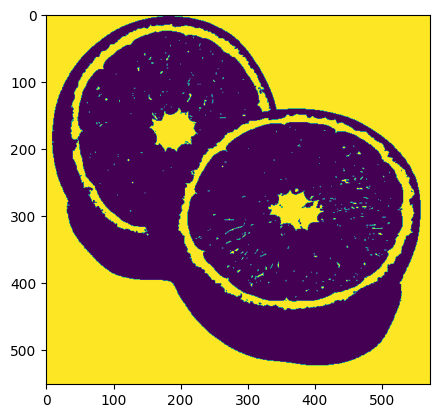

In [70]:
# apply kmeans to image
segmentation, centers = kmeans(np.array(img), 2, 10, 0)

# show segmentation
plt.imshow(segmentation)

In [71]:
segmentation.shape

(551, 572)

In [72]:
def kmeans_example(k, L, seed, scale_factor, image_sigma, img, convergence=True):
    
    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
    
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm, centers = kmeans(I, k, L, seed, convergence)
    Inew = mean_segments(img, segm)
    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    #plt.imshow(img)
    #plt.axis('off')
    #plt.show()
    #img.save('result/kmeans.png')
    return img
    


c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


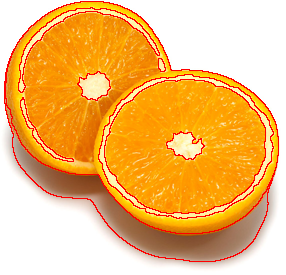

In [73]:
K = 6              # number of clusters used
L = 50              # number of iterations
seed = 14           # seed used for random initialization
scale_factor = 0.5  # image downscale factor
image_sigma = 1.0   # image preblurring scale

kmeans_example(K, L, seed, scale_factor, image_sigma, img, False)

Converged after 3 iterations with 2 clusters
Converged after 5 iterations with 4 clusters
Converged after 5 iterations with 6 clusters
Converged after 5 iterations with 8 clusters
Converged after 11 iterations with 10 clusters
Converged after 19 iterations with 12 clusters


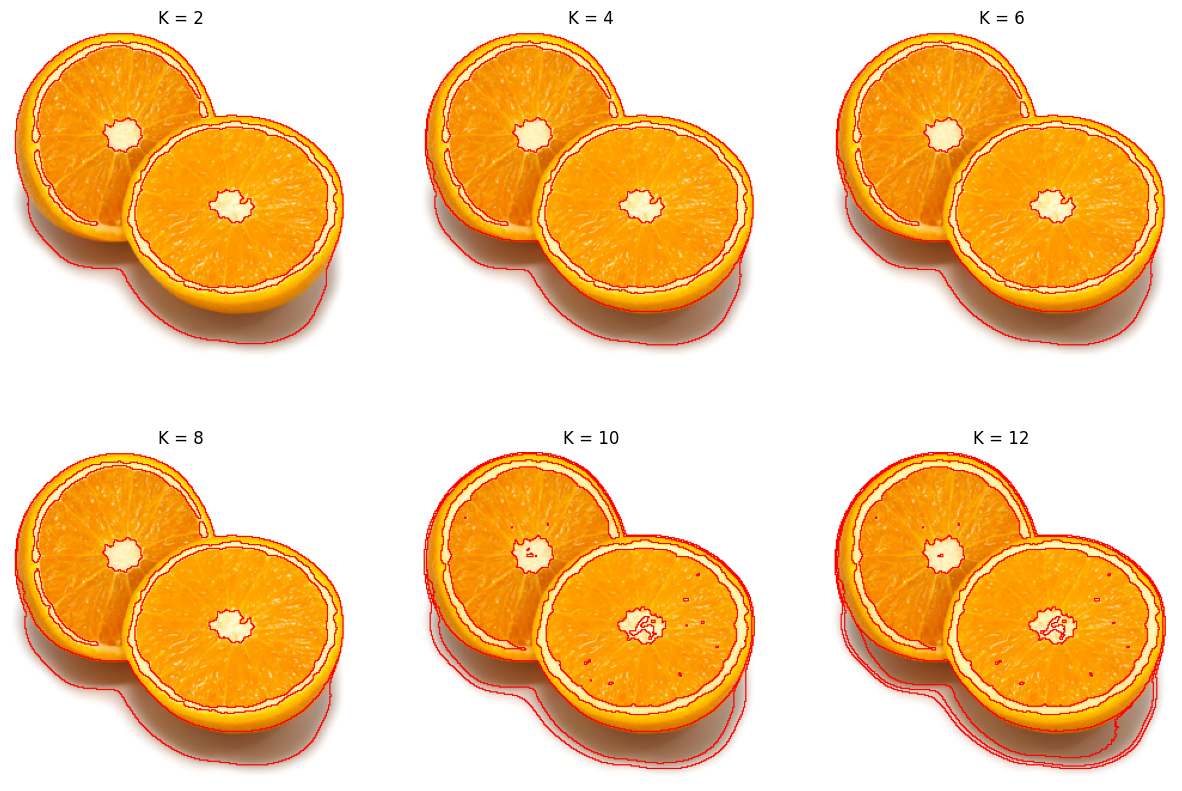

In [74]:
k = [2,4,6,8,10,12]
L = 100 # number of iterations, but algorithm will converge before this

# subplots kmeans examples
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i in range(len(k)):
    axs[i].imshow(kmeans_example(k[i], L, seed, scale_factor, image_sigma, img))
    axs[i].set_title('K = {}'.format(k[i]))
    axs[i].axis('off')
plt.show()

Converged after 6 iterations with 8 clusters
Converged after 6 iterations with 8 clusters
Converged after 6 iterations with 8 clusters
Converged after 5 iterations with 8 clusters


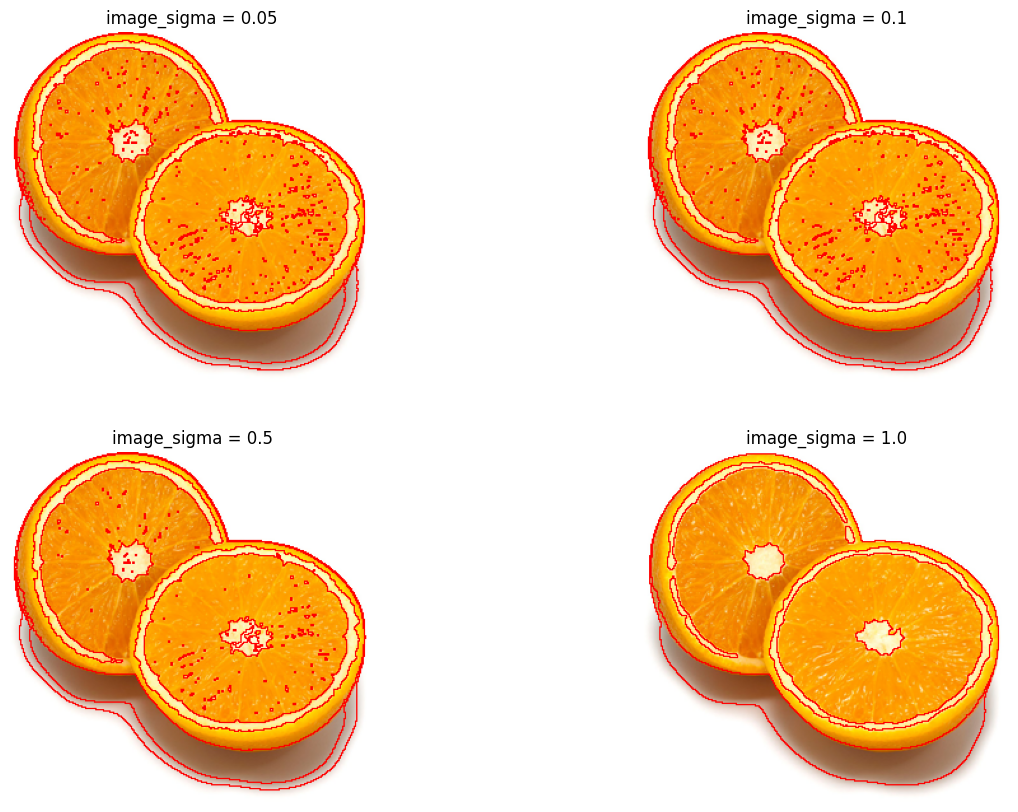

In [75]:
# apply different blur to image
k = 8
#image_sigma = [0.4, .2, .1, .05]
image_sigma = [0.05, .1, .5, 1.0]
# subplots kmeans examples
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for i in range(len(image_sigma)):
    axs[i].imshow(kmeans_example(k, L, seed, scale_factor, image_sigma[i], img))
    axs[i].set_title('image_sigma = {}'.format(image_sigma[i]))
    axs[i].axis('off')
plt.show()

In [76]:
tiger = Image.open('Images-jpg/tiger1.jpg')

Converged after 7 iterations with 2 clusters
Converged after 8 iterations with 4 clusters
Converged after 40 iterations with 6 clusters
Converged after 40 iterations with 8 clusters
Converged after 12 iterations with 10 clusters
Converged after 19 iterations with 12 clusters


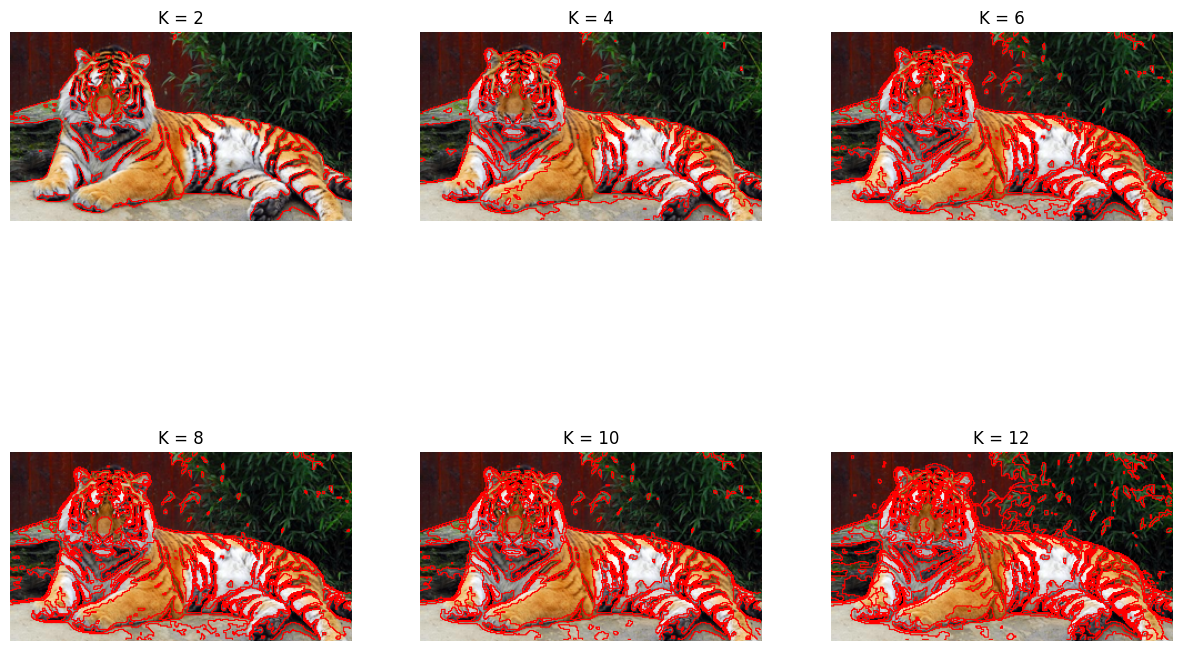

In [77]:
k = [2,4,6,8,10,12]
L = 100 # number of iterations, but algorithm will converge before this
image_sigma = 1.0   # image preblurring scale
# subplots kmeans examples
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i in range(len(k)):
    axs[i].imshow(kmeans_example(k[i], L, seed, scale_factor, image_sigma, tiger))
    axs[i].set_title('K = {}'.format(k[i]))
    axs[i].axis('off')
plt.show()

In [78]:
image_sigma

1.0

Converged after 3 iterations with 2 clusters
Converged after 5 iterations with 4 clusters
Converged after 5 iterations with 6 clusters
Converged after 5 iterations with 8 clusters
Converged after 11 iterations with 10 clusters
Converged after 19 iterations with 12 clusters


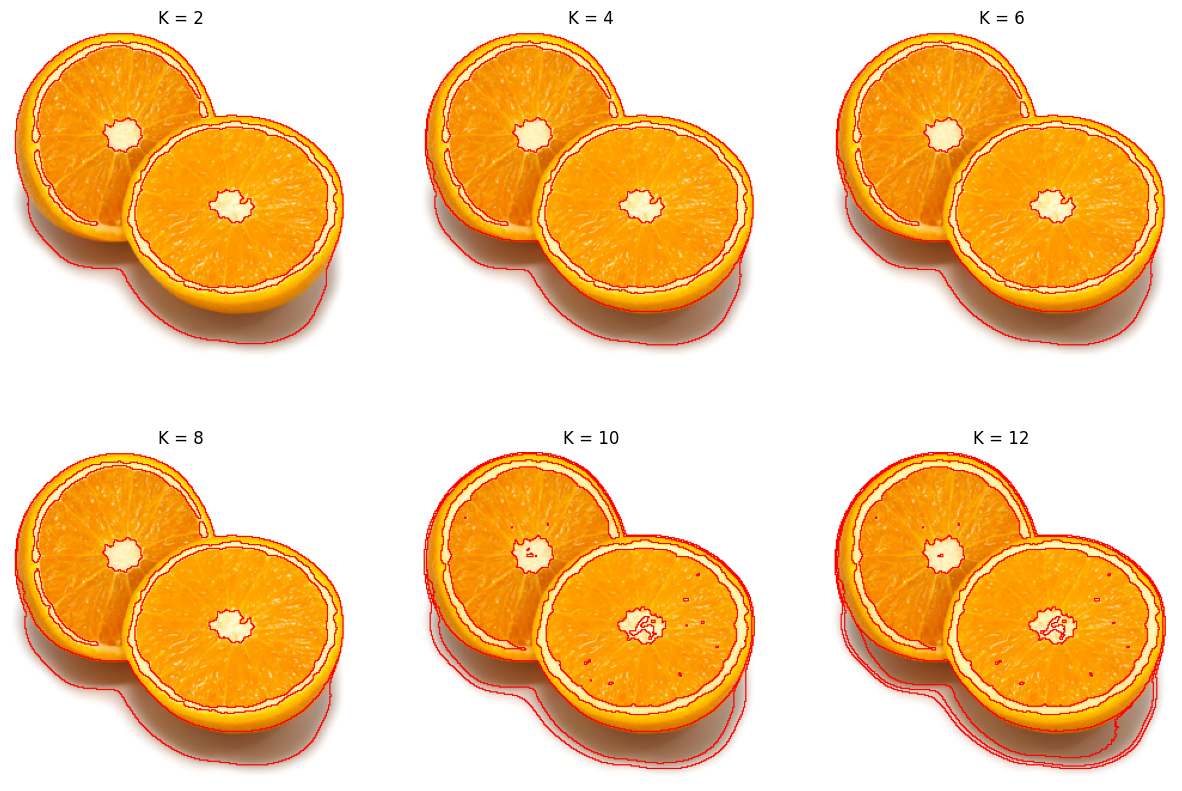

In [79]:
k = [2,4,6,8,10,12]
L = 50 # number of iterations, but algorithm will converge before this

# subplots kmeans examples
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i in range(len(k)):
    axs[i].imshow(kmeans_example(k[i], L, seed, scale_factor, image_sigma, img))
    axs[i].set_title('K = {}'.format(k[i]))
    axs[i].axis('off')
plt.show()

### Mean shift segmentation

In [80]:

def mean_shift_segm(I, spatial_bandwidth, colour_bandwidth, num_iterations):

    print('Find colour channels with K-means...')
    K = 16 # number of channels
    [ segm, centers ] = kmeans(I, K, 20, 4321,False)
    ( height, width, depth ) = np.shape(I)
    idx = np.reshape(segm, (height, width))
    mapsw = np.zeros((height, width, K))
    mapsx = np.zeros((height, width, K))
    mapsy = np.zeros((height, width, K))
    [X, Y] = np.meshgrid(range(width), range(height))
    for k in range(K):
        mapsw[:,:,k] = (idx == k).astype(float)
        mapsx[:,:,k] = gaussian_filter(mapsw[:,:,k]*X, spatial_bandwidth, mode='nearest')
        mapsy[:,:,k] = gaussian_filter(mapsw[:,:,k]*Y, spatial_bandwidth, mode='nearest')
        mapsw[:,:,k] = gaussian_filter(mapsw[:,:,k],   spatial_bandwidth, mode='nearest')
    mapsw = np.reshape(mapsw, (-1, K)) + 1e-6
    mapsx = np.reshape(mapsx, (-1, K))
    mapsy = np.reshape(mapsy, (-1, K))

    print('Search for high density points...')
    constC = -0.5/(colour_bandwidth**2)
    x = np.reshape(X, (width*height, ))
    y = np.reshape(Y, (width*height, ))
    Ic = np.reshape(I, (width*height, 3))
    wei = np.exp(constC*(distance_matrix(Ic, centers)**2))
    for l in range(num_iterations):
        p = (np.round(y)*width + np.round(x)).astype(int)
        ww = mapsw[p,:] * wei
        w = np.sum(ww, axis=1)
        u = (np.matmul(ww, centers).T / w).T
        x = ((np.sum(mapsx[p,:] * wei, axis=1)).T / w).T
        y = ((np.sum(mapsy[p,:] * wei, axis=1)).T / w).T
        wei = (ww.T / w).T
        x = np.maximum(np.minimum(x, width-1), 0);
        y = np.maximum(np.minimum(y, height-1), 0);

    print('Assign high density points to pixels...')
    XY = np.stack((x, y))
    thr = 4.0
    val = 0
    mask = np.zeros((height*width, 1), dtype=np.short)
    for y in range(height):
        for x in range(width):
            p = y*width + x
            if mask[p] == 0:
                stack = [ p ]
                val = val + 1
                mask[p] = val
                while len(stack) > 0:
                    p0 = stack[-1]
                    xy = XY[:, p0]
                    y0 = int(p0/width)
                    x0 = p0 - y0*width
                    stack = stack[:-1]
                    pn = p0 + 1
                    if x0<width-1 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 - 1
                    if x0>0 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 + width
                    if y0<height-1 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 - width
                    if y0>0 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
    segm = np.reshape(mask, (height, width))
    return segm



In [81]:

def mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations):

    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
     
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm = mean_shift_segm(I, spatial_bandwidth, colour_bandwidth, num_iterations)
    Inew_ = mean_segments(img, segm)
    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    
    #plt.imshow(img)
    #plt.axis('off')
    #plt.show()
    #img.save('result/meanshift.png')
    return img, Image.fromarray(Inew_.astype(np.ubyte))

Find colour channels with K-means...
Search for high density points...
Assign high density points to pixels...


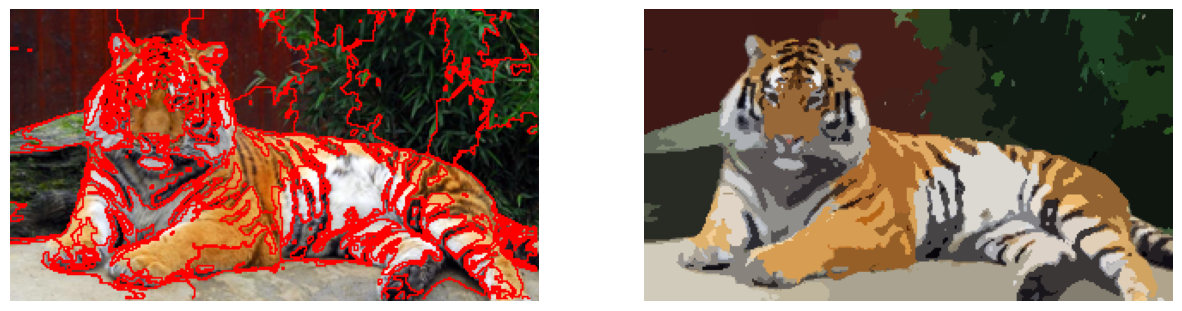

In [82]:
scale_factor = 0.5         # image downscale factor
image_sigma = 1.0          # image preblurring scale
spatial_bandwidth = 10.0   # spatial bandwidth
colour_bandwidth = 20.0    # colour bandwidth
num_iterations = 40        # number of mean-shift iterations    
img = Image.open('Images-jpg/tiger1.jpg')
overlap, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations)

# subplot for spatial bandwidth
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(overlap)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
plt.show()

In [83]:
'''spatial_bandwidth = [2., 2.5, 3., 3.5, 4., 5., 7.5, 10.]
img = Image.open('Images-jpg/tiger1.jpg')

# subplot for spatial bandwidth
fig, axs = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spatial Bandwidth')
axs = axs.ravel()
for i in range(len(spatial_bandwidth)):
    img_t, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth[i], colour_bandwidth, num_iterations)
    axs[i].imshow(img_t)
    axs[i].set_title('σs = ' + str(spatial_bandwidth[i]))
    axs[i].axis('off')
plt.show()'''

"spatial_bandwidth = [2., 2.5, 3., 3.5, 4., 5., 7.5, 10.]\nimg = Image.open('Images-jpg/tiger1.jpg')\n\n# subplot for spatial bandwidth\nfig, axs = plt.subplots(2, 4, figsize=(15, 6))\nfig.suptitle('Spatial Bandwidth')\naxs = axs.ravel()\nfor i in range(len(spatial_bandwidth)):\n    img_t, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth[i], colour_bandwidth, num_iterations)\n    axs[i].imshow(img_t)\n    axs[i].set_title('σs = ' + str(spatial_bandwidth[i]))\n    axs[i].axis('off')\nplt.show()"

Find colour channels with K-means...
Search for high density points...
Assign high density points to pixels...


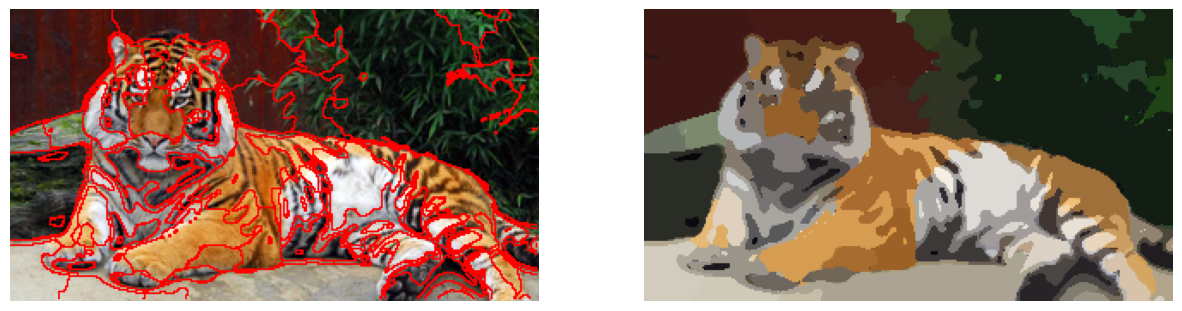

In [84]:
spatial_bandwidth = 9
colour_bandwidth = 15
image_sigma = 2
img = Image.open('Images-jpg/tiger1.jpg')

mean_shift_img, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations)

# plot mean shift image and segmentation
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(mean_shift_img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
plt.show()

Find colour channels with K-means...
Search for high density points...
Assign high density points to pixels...


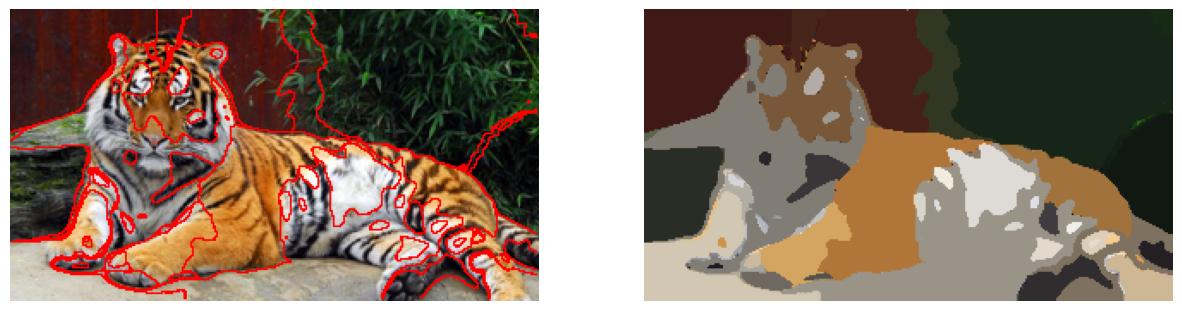

In [85]:
spatial_bandwidth = 20
colour_bandwidth = 30
scale_factor = 0.5
image_sigma = 2.5
img = Image.open('Images-jpg/tiger1.jpg')

mean_shift_img, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations)

# plot mean shift image and segmentation
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(mean_shift_img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
plt.show()

Find colour channels with K-means...
Search for high density points...
Assign high density points to pixels...


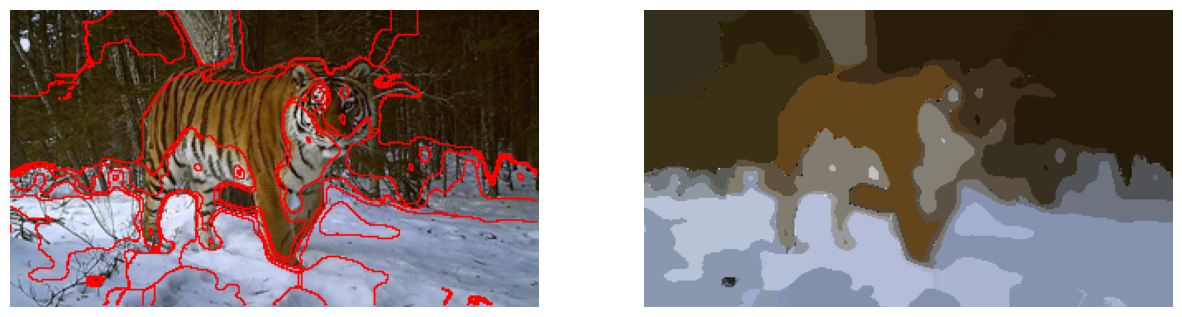

In [86]:
spatial_bandwidth = 15
colour_bandwidth = 10
scale_factor = 0.5
image_sigma = 3
img = Image.open('Images-jpg/tiger2.jpg')

mean_shift_img, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations)

# plot mean shift image and segmentation
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(mean_shift_img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
plt.show()

Find colour channels with K-means...
Search for high density points...
Assign high density points to pixels...


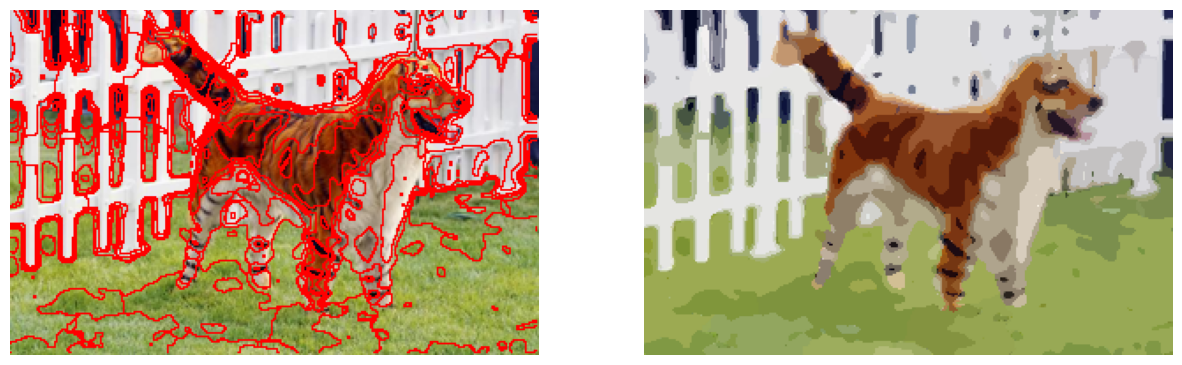

In [87]:
spatial_bandwidth = 10
colour_bandwidth = 5
scale_factor = .5
image_sigma = 2
img = Image.open('Images-jpg/tiger3.jpg')

mean_shift_img, segm = mean_shift_example(img, scale_factor, image_sigma, spatial_bandwidth, colour_bandwidth, num_iterations)

# plot mean shift image and segmentation
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(mean_shift_img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
plt.show()

### Normalized cut

In [88]:
from norm_cuts_example import *


def norm_cuts_custom(img, colour_bandwidth = 20.0, radius = 1, ncuts_thresh = 0.10, min_area = 200, max_depth = 12, scale_factor = 0.25, image_sigma = 0.5):

    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
     
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm = norm_cuts_segm(I, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth)
    Inew = mean_segments(img, segm)
    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img.save('result/normcuts1.png')

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(8908,4182) ROOT
Cutting ncut=0.002 sizes=(5902,3006) ROOT-A
Cutting ncut=0.000 sizes=(1106,4796) ROOT-A-A
Cutting ncut=0.001 sizes=(381,725) ROOT-A-A-A
Cutting ncut=0.003 sizes=(117,264) ROOT-A-A-A-A
Cutting ncut=0.000 sizes=(42,683) ROOT-A-A-A-B
Cutting ncut=0.000 sizes=(3818,978) ROOT-A-A-B
Cutting ncut=0.000 sizes=(3791,27) ROOT-A-A-B-A
Cutting ncut=0.000 sizes=(358,620) ROOT-A-A-B-B
Cutting ncut=0.001 sizes=(37,321) ROOT-A-A-B-B-A
Cutting ncut=0.000 sizes=(64,556) ROOT-A-A-B-B-B
Cutting ncut=0.003 sizes=(964,2042) ROOT-A-B
Cutting ncut=0.000 sizes=(742,222) ROOT-A-B-A
Cutting ncut=0.000 sizes=(590,152) ROOT-A-B-A-A
Cutting ncut=0.004 sizes=(21,201) ROOT-A-B-A-B
Cutting ncut=0.004 sizes=(1386,656) ROOT-A-B-B
Cutting ncut=0.003 sizes=(750,636) ROOT-A-B-B-A
Cutting ncut=0.020 sizes=(330,420) ROOT-A-B-B-A-A
Cutting ncut=0.019 sizes=(297,33) ROOT-A-B-B-A-A-A
Cutting ncut=0.026 sizes=(96,

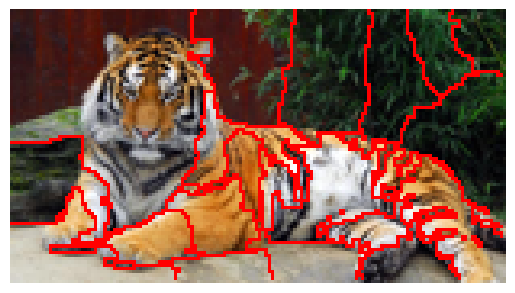

In [89]:
colour_bandwidth = 20.0  # color bandwidth
radius = 1               # maximum neighbourhood distance
ncuts_thresh = 0.10      # cutting threshold
min_area = 200           # minimum area of segment
max_depth = 12           # maximum splitting depth
scale_factor = 0.25      # image downscale factor
image_sigma = 0.5        # image preblurring scale

img = Image.open('Images-jpg/tiger1.jpg')

norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(4182,8908) ROOT
Cutting ncut=0.009 sizes=(2286,1896) ROOT-A
Cutting ncut=0.011 sizes=(967,1319) ROOT-A-A
Cutting ncut=0.035 sizes=(893,74) ROOT-A-A-A
Cutting ncut=0.016 sizes=(682,637) ROOT-A-A-B
Cutting ncut=0.011 sizes=(638,44) ROOT-A-A-B-A
Cutting ncut=0.022 sizes=(284,353) ROOT-A-A-B-B
Cutting ncut=0.040 sizes=(205,79) ROOT-A-A-B-B-A
Cutting ncut=0.028 sizes=(166,187) ROOT-A-A-B-B-B
Cutting ncut=0.013 sizes=(976,920) ROOT-A-B
Cutting ncut=0.001 sizes=(36,940) ROOT-A-B-A
Cutting ncut=0.027 sizes=(171,749) ROOT-A-B-B
Cutting ncut=0.002 sizes=(5902,3006) ROOT-B
Cutting ncut=0.000 sizes=(4796,1106) ROOT-B-A
Cutting ncut=0.000 sizes=(3814,982) ROOT-B-A-A
Cutting ncut=0.000 sizes=(3787,27) ROOT-B-A-A-A
Cutting ncut=0.000 sizes=(359,623) ROOT-B-A-A-B
Cutting ncut=0.001 sizes=(37,322) ROOT-B-A-A-B-A
Cutting ncut=0.000 sizes=(559,64) ROOT-B-A-A-B-B
Cutting ncut=0.001 sizes=(381,725) ROOT-B-A

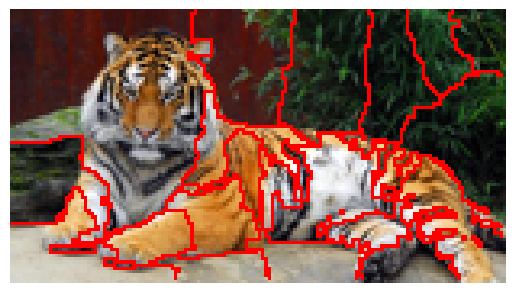

In [90]:
norm_cuts_custom(img, colour_bandwidth, radius, 0.2, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(8908,4182) ROOT
Cutting ncut=0.001 sizes=(2997,5911) ROOT-A
Cutting ncut=0.000 sizes=(516,2481) ROOT-A-A
Cutting ncut=0.009 sizes=(269,247) ROOT-A-A-A
Cutting ncut=0.045 sizes=(135,134) ROOT-A-A-A-A
Cutting ncut=0.050 sizes=(194,53) ROOT-A-A-A-B
Cutting ncut=0.004 sizes=(859,1622) ROOT-A-A-B
Cutting ncut=0.005 sizes=(519,340) ROOT-A-A-B-A
Cutting ncut=0.011 sizes=(105,414) ROOT-A-A-B-A-A
Cutting ncut=0.001 sizes=(292,48) ROOT-A-A-B-A-B
Cutting ncut=0.003 sizes=(962,660) ROOT-A-A-B-B
Cutting ncut=0.007 sizes=(675,287) ROOT-A-A-B-B-A
Cutting ncut=0.018 sizes=(276,399) ROOT-A-A-B-B-A-A
Cutting ncut=0.001 sizes=(1,275) ROOT-A-A-B-B-A-A-A
Cutting ncut=0.040 sizes=(190,209) ROOT-A-A-B-B-A-A-B
Cutting ncut=0.025 sizes=(144,143) ROOT-A-A-B-B-A-B
Cutting ncut=0.015 sizes=(263,397) ROOT-A-A-B-B-B
Cutting ncut=0.029 sizes=(177,86) ROOT-A-A-B-B-B-A
Cutting ncut=0.114 sizes=(8,389) ROOT-A-A-B-B-B-B


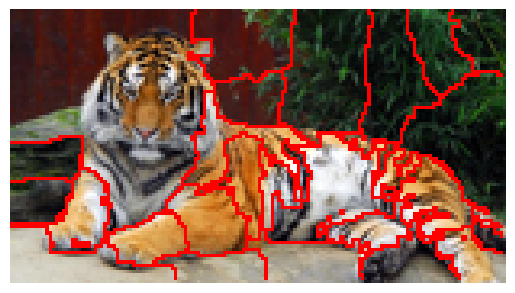

In [91]:
norm_cuts_custom(img, colour_bandwidth, radius, 0.3, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(8909,4181) ROOT
Cutting ncut=0.002 sizes=(5902,3007) ROOT-A
Cutting ncut=0.000 sizes=(4796,1106) ROOT-A-A
Cutting ncut=0.000 sizes=(966,3830) ROOT-A-A-A
Cutting ncut=0.000 sizes=(358,608) ROOT-A-A-A-A
Cutting ncut=0.001 sizes=(37,321) ROOT-A-A-A-A-A
Cutting ncut=0.003 sizes=(543,65) ROOT-A-A-A-A-B
Cutting ncut=0.000 sizes=(3803,27) ROOT-A-A-A-B
Cutting ncut=0.001 sizes=(725,381) ROOT-A-A-B
Cutting ncut=0.000 sizes=(42,683) ROOT-A-A-B-A
Cutting ncut=0.003 sizes=(117,264) ROOT-A-A-B-B
Cutting ncut=0.002 sizes=(967,2040) ROOT-A-B
Cutting ncut=0.000 sizes=(745,222) ROOT-A-B-A
Cutting ncut=0.000 sizes=(592,153) ROOT-A-B-A-A
Cutting ncut=0.004 sizes=(21,201) ROOT-A-B-A-B
Cutting ncut=0.004 sizes=(1385,655) ROOT-A-B-B
Cutting ncut=0.003 sizes=(636,749) ROOT-A-B-B-A
Cutting ncut=0.017 sizes=(250,386) ROOT-A-B-B-A-A
Cutting ncut=0.031 sizes=(118,132) ROOT-A-B-B-A-A-A
Cutting ncut=0.054 sizes=(31

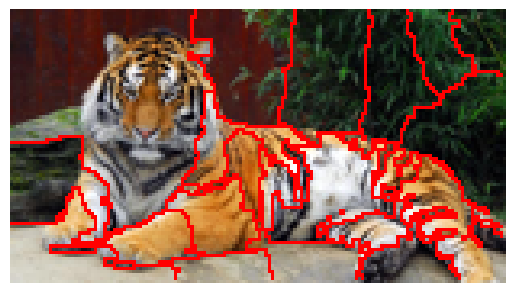

In [92]:
norm_cuts_custom(img, colour_bandwidth, radius, 0.5, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(8909,4181) ROOT
Cutting ncut=0.001 sizes=(5912,2997) ROOT-A
Cutting ncut=0.000 sizes=(4793,1119) ROOT-A-A
Cutting ncut=0.000 sizes=(3815,978) ROOT-A-A-A
Cutting ncut=0.000 sizes=(27,3788) ROOT-A-A-A-A
Cutting ncut=0.000 sizes=(620,358) ROOT-A-A-A-B
Cutting ncut=0.000 sizes=(556,64) ROOT-A-A-A-B-A
Cutting ncut=0.001 sizes=(321,37) ROOT-A-A-A-B-B
Cutting ncut=0.001 sizes=(393,726) ROOT-A-A-B
Cutting ncut=0.002 sizes=(81,312) ROOT-A-A-B-A
Cutting ncut=0.000 sizes=(684,42) ROOT-A-A-B-B
Cutting ncut=0.000 sizes=(516,2481) ROOT-A-B
Cutting ncut=0.009 sizes=(247,269) ROOT-A-B-A
Cutting ncut=0.004 sizes=(859,1622) ROOT-A-B-B
Cutting ncut=0.005 sizes=(519,340) ROOT-A-B-B-A
Cutting ncut=0.011 sizes=(105,414) ROOT-A-B-B-A-A
Cutting ncut=0.001 sizes=(48,292) ROOT-A-B-B-A-B
Cutting ncut=0.003 sizes=(962,660) ROOT-A-B-B-B
Cutting ncut=0.007 sizes=(287,675) ROOT-A-B-B-B-A
Cutting ncut=0.015 sizes=(263

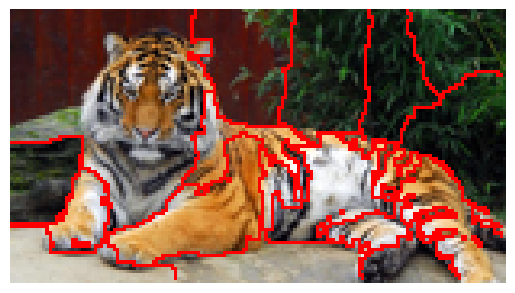

In [93]:
norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, 300, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(8909,4181) ROOT
Cutting ncut=0.001 sizes=(3008,5901) ROOT-A
Cutting ncut=0.002 sizes=(2040,968) ROOT-A-A
Cutting ncut=0.004 sizes=(1385,655) ROOT-A-A-A
Cutting ncut=0.003 sizes=(635,750) ROOT-A-A-A-A
Cutting ncut=0.017 sizes=(250,385) ROOT-A-A-A-A-A
Cutting ncut=0.031 sizes=(118,132) ROOT-A-A-A-A-A-A
Cutting ncut=0.075 sizes=(73,45) ROOT-A-A-A-A-A-A-A
Cutting ncut=0.071 sizes=(63,69) ROOT-A-A-A-A-A-A-B
Cutting ncut=0.053 sizes=(77,308) ROOT-A-A-A-A-A-B
Cutting ncut=0.020 sizes=(420,330) ROOT-A-A-A-A-B
Cutting ncut=0.026 sizes=(96,324) ROOT-A-A-A-A-B-A
Cutting ncut=0.019 sizes=(297,33) ROOT-A-A-A-A-B-B
Cutting ncut=0.018 sizes=(462,193) ROOT-A-A-A-B
Cutting ncut=0.021 sizes=(185,277) ROOT-A-A-A-B-A
Cutting ncut=0.023 sizes=(97,88) ROOT-A-A-A-B-A-A
Cutting ncut=0.024 sizes=(267,10) ROOT-A-A-A-B-A-B
Cutting ncut=0.001 sizes=(11,182) ROOT-A-A-A-B-B
Cutting ncut=0.000 sizes=(747,221) ROOT-A-

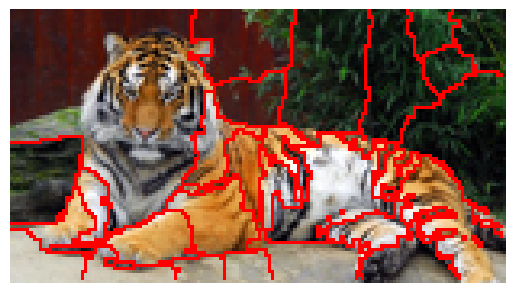

In [94]:
ncuts_thresh = 0.10      # cutting threshold
min_area = 100           # minimum area of segment

norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(7620,5470) ROOT
Cutting ncut=0.005 sizes=(4943,2677) ROOT-A
Cutting ncut=0.000 sizes=(914,4029) ROOT-A-A
Cutting ncut=0.010 sizes=(776,138) ROOT-A-A-A
Cutting ncut=0.007 sizes=(327,449) ROOT-A-A-A-A
Cutting ncut=0.000 sizes=(62,265) ROOT-A-A-A-A-A
Cutting ncut=0.003 sizes=(232,217) ROOT-A-A-A-A-B
Cutting ncut=0.002 sizes=(40,192) ROOT-A-A-A-A-B-A
Cutting ncut=-0.000 sizes=(1,216) ROOT-A-A-A-A-B-B
Cutting ncut=0.002 sizes=(88,50) ROOT-A-A-A-B
Cutting ncut=0.001 sizes=(3973,56) ROOT-A-A-B
Cutting ncut=0.000 sizes=(2346,331) ROOT-A-B
Cutting ncut=0.000 sizes=(2337,9) ROOT-A-B-A
Cutting ncut=0.027 sizes=(301,30) ROOT-A-B-B
Cutting ncut=0.002 sizes=(3996,1474) ROOT-B
Cutting ncut=0.002 sizes=(1646,2350) ROOT-B-A
Cutting ncut=0.005 sizes=(904,742) ROOT-B-A-A
Cutting ncut=0.001 sizes=(276,628) ROOT-B-A-A-A
Cutting ncut=0.001 sizes=(140,136) ROOT-B-A-A-A-A
Cutting ncut=0.015 sizes=(57,83) ROOT-

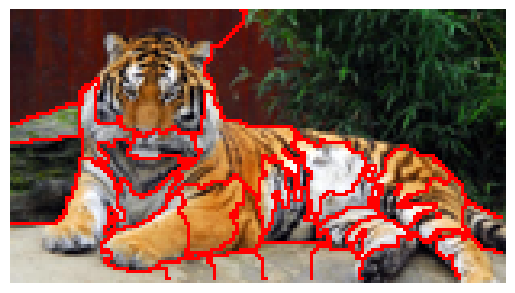

In [95]:
radius = 2

norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth, scale_factor, image_sigma)


Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.007 sizes=(6783,6307) ROOT
Cutting ncut=0.012 sizes=(4150,2633) ROOT-A
Cutting ncut=0.070 sizes=(2695,1455) ROOT-A-A
Cutting ncut=0.144 sizes=(936,1759) ROOT-A-A-A
Cutting ncut=0.077 sizes=(708,747) ROOT-A-A-B
Cutting ncut=0.304 sizes=(330,378) ROOT-A-A-B-A
Cutting ncut=0.243 sizes=(580,167) ROOT-A-A-B-B
Cutting ncut=0.008 sizes=(1863,770) ROOT-A-B
Cutting ncut=0.027 sizes=(1094,769) ROOT-A-B-A
Cutting ncut=0.238 sizes=(806,288) ROOT-A-B-A-A
Cutting ncut=0.139 sizes=(546,223) ROOT-A-B-A-B
Cutting ncut=0.007 sizes=(535,235) ROOT-A-B-B
Cutting ncut=0.385 sizes=(496,39) ROOT-A-B-B-A
Cutting ncut=0.308 sizes=(110,125) ROOT-A-B-B-B
Cutting ncut=0.009 sizes=(3023,3284) ROOT-B
Cutting ncut=0.023 sizes=(1350,1673) ROOT-B-A
Cutting ncut=0.021 sizes=(750,600) ROOT-B-A-A
Cutting ncut=0.110 sizes=(439,311) ROOT-B-A-A-A
Cutting ncut=0.013 sizes=(437,163) ROOT-B-A-A-B
Cutting ncut=0.090 sizes=(305,132) ROOT-B-A

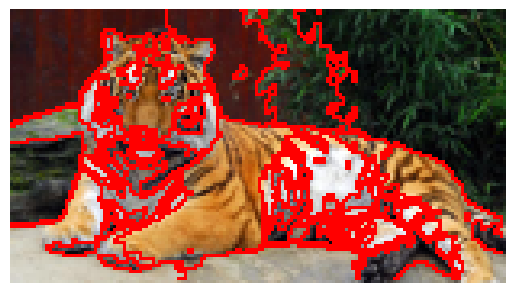

In [96]:
radius = 10
norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth, scale_factor, image_sigma)

Compute affinity matrix...
Solve eigenvalue problems to find partitions...
Cutting ncut=0.001 sizes=(7620,5470) ROOT
Cutting ncut=0.005 sizes=(4943,2677) ROOT-A
Cutting ncut=0.000 sizes=(914,4029) ROOT-A-A
Cutting ncut=0.010 sizes=(776,138) ROOT-A-A-A
Cutting ncut=0.007 sizes=(327,449) ROOT-A-A-A-A
Cutting ncut=0.000 sizes=(62,265) ROOT-A-A-A-A-A
Cutting ncut=0.003 sizes=(217,232) ROOT-A-A-A-A-B
Cutting ncut=-0.000 sizes=(1,216) ROOT-A-A-A-A-B-A
Cutting ncut=0.002 sizes=(192,40) ROOT-A-A-A-A-B-B
Cutting ncut=0.002 sizes=(50,88) ROOT-A-A-A-B
Cutting ncut=0.001 sizes=(3973,56) ROOT-A-A-B
Cutting ncut=0.000 sizes=(2346,331) ROOT-A-B
Cutting ncut=0.000 sizes=(2337,9) ROOT-A-B-A
Cutting ncut=0.027 sizes=(301,30) ROOT-A-B-B
Cutting ncut=0.002 sizes=(1466,4004) ROOT-B
Cutting ncut=0.001 sizes=(937,529) ROOT-B-A
Cutting ncut=0.006 sizes=(563,374) ROOT-B-A-A
Cutting ncut=0.015 sizes=(400,163) ROOT-B-A-A-A
Cutting ncut=0.006 sizes=(239,161) ROOT-B-A-A-A-A
Cutting ncut=0.054 sizes=(83,156) ROOT-B

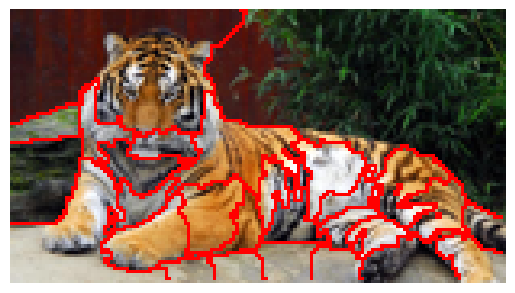

In [97]:
#tiger1: colour_bandwidth = 15, radius = 10, ncuts_thresh = 0.5, min_area = 18, max_depth = 6

colour_bandwidth = 20 
radius = 2
ncuts_thresh = 0.5
min_area = 100
max_depth = 15

norm_cuts_custom(img, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth, scale_factor, image_sigma)

## Segmentation using graph cuts

In [98]:
from graphcut_example import *

In [99]:
tiger1 = Image.open('Images-jpg/tiger1.jpg')
tiger2 = Image.open('Images-jpg/tiger2.jpg')
tiger3 = Image.open('Images-jpg/tiger3.jpg')

In [100]:
#img, segm, prior = graphcut_example(tiger1, scale_factor=0.5, area=[ 80, 110, 570, 300 ], K=5, alpha=15.0, sigma=10.0)
img, segm, prior = graphcut_example(tiger2, scale_factor=0.5, area=[210, 125, 400, 200], K=20, alpha=10.0, sigma=25.0)

Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100
Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100
Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100


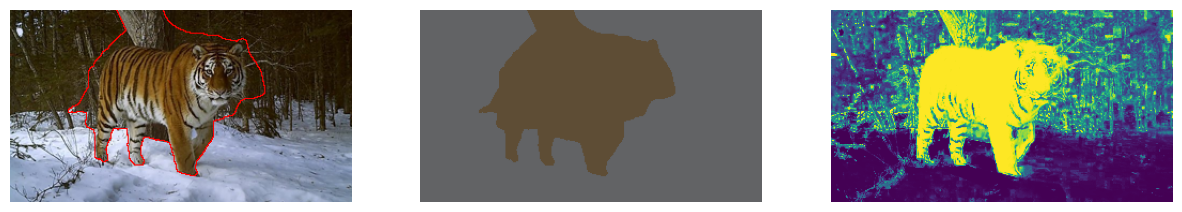

In [101]:
# plot graph cut image and segmentation and prior
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
axs[2].imshow(prior)
axs[2].axis('off')
plt.show()


Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100
Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100
Find Gaussian mixture models...
Find minimum cut...
number of iterations = 100


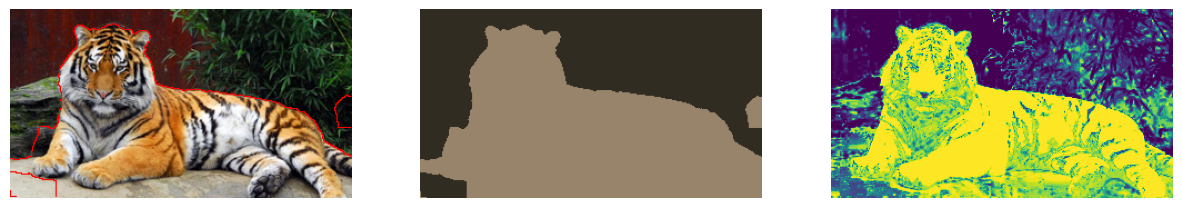

In [102]:
# plot graph cut image and segmentation and prior
img, segm, prior = graphcut_example(tiger1, scale_factor=0.5, area=[ 80, 110, 570, 300 ], K=20, alpha=15.0, sigma=10.0)
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.ravel()
axs[0].imshow(img)
axs[0].axis('off')
axs[1].imshow(segm)
axs[1].axis('off')
axs[2].imshow(prior)
axs[2].axis('off')
plt.show()
